# Curve fitting - Python libraries

by Xiaofeng Liu, Ph.D., P.E.
Associate Professor

Department of Civil and Environmental Engineering

Institute of CyberScience

Penn State University 

223B Sackett Building, University Park, PA 16802

Web: http://water.engr.psu.edu/liu/

---

## Python built-in curve fitting and interpolation functions and capabilities


There are numerous choices in terms of curve fitting and interpolation in Python. The most notable one is SciPy. It has a full webpage with information on this topic:
[Introduction of interpolation in SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html). These functions include 1D, 2D, and multi-dimension interpolations; linear and nonlinear curve fitting; specialzied polynomial curve fitting; etc. Although not covered in this course, it also implements the Spline interpolations. 

The following demonstrate some usages of these built-in functions.


* Numpy's "polyfit(...)" function for polynomial regression. 
    The following example use a set of data points and calls the "polyfit" function in Numpy which takes the data set and desired polynomial order as input and returns the polynomial coefficients. The example also utilizes the "poly1d" function in Numpy which constructs a one-dimensional polynomial (meaning a polynomial function of single variable) from given coefficients. The constructed polynomial function can then be used to evaluate function values at given $x$.

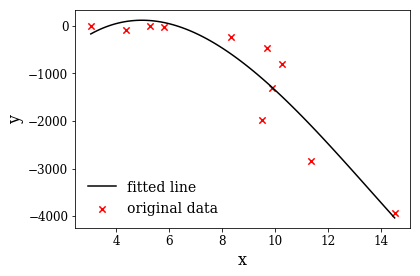

In [49]:
import numpy as np
import matplotlib.pyplot as plt

#plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

x = np.array([3.04, 4.37, 5.26, 5.82, 8.33, 9.51, 9.69, 9.89, 10.26, 11.37, 14.53])
y = np.array([3.07, -90.43, 1.92, -23.57, -227.71, -1978.53, -458.08, -1312.24, -811.01, -2845.27, -3933.67])

#set the degree of polynomial and call polyfit to get the coefficients.
degree = 3
coeffs = np.polyfit(x, y, degree)

#get the fitted function
f_fit = np.poly1d(coeffs)

x_new = np.linspace(x[0], x[-1], 100)

# plotting the original data points
plt.scatter(x, y, c = "r", marker = "x", s = 40, label='original data') 

# predicted value using the fitting curve
y_pred =f_fit(x_new)

# plotting the regression line 
plt.plot(x_new, y_pred, color = "k", label='fitted line') 

#plt.text(5,5,r'$r^2$ = %.2f'%r2, fontsize=14)

plt.xlabel('x',fontsize=16) 
plt.ylabel('y',fontsize=16) 

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

plt.legend(loc='lower left',fontsize=14,frameon=False)

plt.show() 


----------------------------------
* The "least_squares" function in [SciPy (Scientific Python)](https://www.scipy.org)'s optimize library: it uses non-linear least squares to fit a function for a given set of data points. Note that there is also the legacy "leastsq(...)" function available in SciPy. The newer version of the least squares regression "least_squares(...)" can specify the upper and lower bounds for regression parameters. You should use the newer version unless you have a special reason to use the old version "leastsq(...)". 

\begin{equation}
y=A\left(1-e^{-x/A} \right)
\end{equation}

curve fitting coefficients =  [  0.98867629 127.41190486]


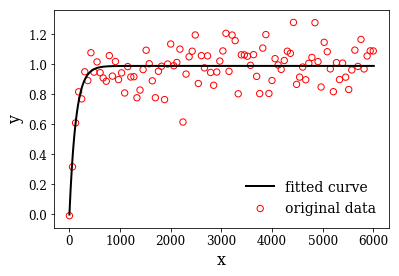

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

#plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

#define the function 
def func(coeffs, x):
    #print(coeffs)
    return (coeffs[0]*(1 - np.exp(-x/(coeffs[1]+1E-6))))

#define the residual function 
def residual_func(coeffs, x, y):
    return (func(coeffs, x) - y)

#generate some data (function value + some noise)
def gen_data(x, A, noise=0):
    return (func(A, x) + np.random.randn(len(x))*noise)

xmax = 6000    #upper bound for x
N = 100        #number of data points to sample (to be used for curve fitting)
A = np.array([1.0, 200.0])      #true model parameters
noise = 0.1    #model parameter for noise level (generation of training data)

#starting guess of model parameter values
coeffs0 = np.array([0.2, 50.0])

#call the data generation function
x_train = np.linspace(0, xmax, N)
y_train = gen_data(x_train, A, noise)

#plot the data points
plt.scatter(x_train, y_train, marker = "o", s = 40, edgecolor = "r", facecolor='None', label='original data') 

#curve fitting by calling the least_squares(...) function.
r = scipy.optimize.least_squares(residual_func, coeffs0, args=(x_train, y_train))
print("curve fitting coefficients = ", r.x)

#calculate the fitted curve
x_fit   = np.linspace(-0.1, xmax+10, 1000)
y_fit = gen_data(x_fit, r.x, 0.0)

#plot the fitted curve
plt.plot(x_fit, y_fit, lw=2, c='k', label="fitted curve")

plt.xlabel('x',fontsize=16) 
plt.ylabel('y',fontsize=16) 

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

plt.legend(loc='lower right',fontsize=14,frameon=False)    

plt.show()

-------------------------------
* The "curve_fit" function in [SciPy (Scientific Python)](https://www.scipy.org)'s optimize library: it uses non-linear least squares to fit a function for a given set of data. 

The following example code fits a curve in the form of 
\begin{equation}
  f(x) = ae^{-bx}+c
\end{equation}
where $a$, $b$, and $c$ are fitting coefficients. 

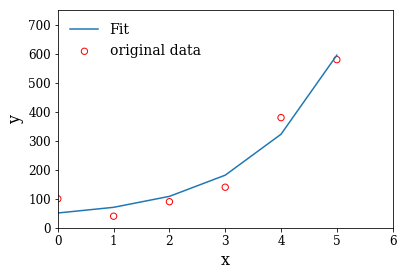

In [47]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

#plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

def exponential_func(x, a, b, c):
    return a*np.exp(-b*x) + c

x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([100, 40, 90, 140, 380, 580])
fitting_parameters, covariance = curve_fit(exponential_func, x, y)
a, b, c = fitting_parameters

plt.scatter(x, y, marker = "o", s = 40, edgecolor = "r", facecolor='None', label='original data') 

plt.plot(x, exponential_func(x, *fitting_parameters), '-', label='Fit')

plt.axis([0, 6, 0, 750])

plt.xlabel('x',fontsize=16) 
plt.ylabel('y',fontsize=16) 

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

plt.legend(loc='upper left',fontsize=14,frameon=False)    

plt.show()

--------------------
* Numpy's "interp(...)" function: which performs one-dimensional, piecewise linear interpolation with a given set of data points ($x_i$, $f_i$), and return the interpolated function value at the given $x$. For the given data points, the $x_i$ has to be in ascending order. 

In the following example code, it plots the original data with line and cross. The interpolated data points are also plotted as filled circles. 

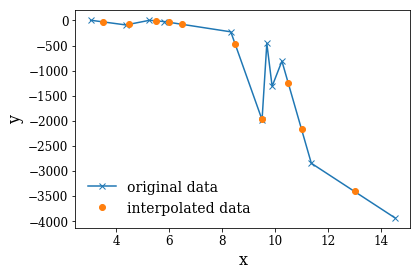

In [48]:
import numpy as np
import matplotlib.pyplot as plt

#plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"


x = np.array([3.04, 4.37, 5.26, 5.82, 8.33, 9.51, 9.69, 9.89, 10.26, 11.37, 14.53])
y = np.array([3.07, -90.43, 1.92, -23.57, -227.71, -1978.53, -458.08, -1312.24, -811.01, -2845.27, -3933.67])

xvals = np.array([3.5, 4.5, 5.5, 6.0, 6.5, 8.5, 9.5, 10.5, 11.0, 13.0])
yinterp = np.interp(xvals, x, y)

plt.plot(x, y, '-x', label='original data')
plt.plot(xvals, yinterp, 'o', label='interpolated data')

plt.xlabel('x',fontsize=16) 
plt.ylabel('y',fontsize=16) 

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

plt.legend(loc='lower left',fontsize=14,frameon=False)

plt.show()